<h1>  Beer vs Urine  </h>

Multifil_Lda model for 4 beer samples verses 5 urine samples.
T-test, log2 Fold Change. Significance on adjusted p-values(function from stack overflow) 
Also PCA plot for Files(samples) and for topics.  
All out put to a CSV file.'b4_u5_alltopics.csv'  



In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
# Not sure why python not looking in here but runs from anoconder command line in this enviroment
import sys
sys.path.append ('C:\Users\Fran\Anaconda2\envs\ipykernel_py2\Lib\site-packages')

import pylab as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display, HTML

import os
import platform

#if platform.system().lower() == 'linux':
#    basedir = '/home/joewandy/git/multifile_lda'
#else:
basedir ='C:\Users\Fran\Documents\MScProject\workspace\MultiFile\multifile_lda'
sys.path.append(basedir)

from multifile_analysis import MultifileAnalysis
from multifile_viz import MultifileLDAViz
from multifile_lda import MultifileLDA

sns.set_style("whitegrid", {'axes.grid' : False})

<h3> Load existing LDA results for beer versus urine data</h2>

In [2]:
analysis = MultifileAnalysis.resume_from('results/beer_urine_2.project')
print analysis.last_saved_timestamp, analysis.message
#plt.plot(analysis.model.log_likelihoods)

Project loaded from results/beer_urine_2.project time taken = 47.1998458031
Sat Jun 18 21:38:13 2016 testing example script on urine and beer data


### 1. PCA on Expected Alphas

In [10]:
import sklearn.decomposition as deco

alphas = np.array(analysis.model.mean_alpha) 
x = np.divide(alphas, alphas.sum(axis = 0)) # expected alphas
n_components = 2
pca = deco.PCA(n_components) # n_components is the components number after reduction
x_r = pca.fit(x).transform(x)
print ('explained variance (first %d components): %.2f'%(n_components, sum(pca.explained_variance_ratio_)))##

explained variance (first 2 components): 0.73


C:\Users\Fran\Anaconda2\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


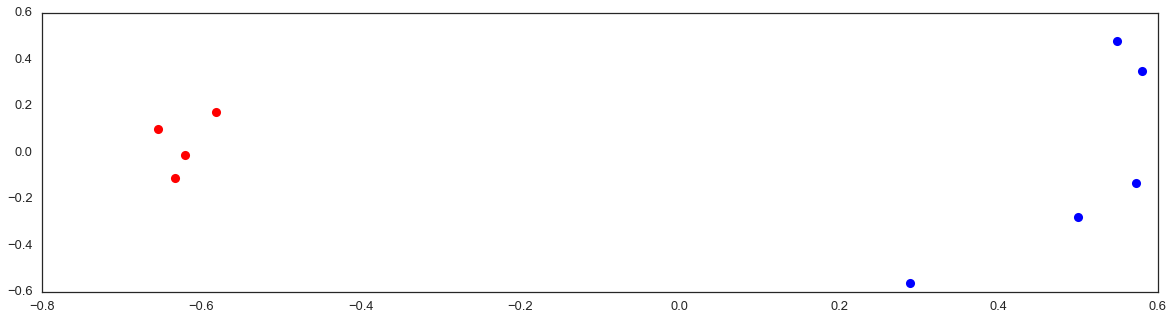

In [11]:
fig = plt.figure()
for i,x in enumerate(x_r[:,0]):
    y = x_r[i,1]
#    plt.text(x,y,"hello")
    if i < 4:
        plt.plot(x,y,'ro')
    else:
        plt.plot(x,y,'bo')
        
fig.show()
fig.savefig('BvU_PCA.pdf')

####  PCA plot  of first 2 principal component access beer in red , urine in blue

In [20]:
x = np.divide(alphas, alphas.sum(axis = 0)).transpose() # expected alphas

pca = deco.PCA(n_components) # n_components is the components number after reduction
x_r = pca.fit(x).transform(x)
print ('explained variance (first %d components): %.2f'%(n_components, sum(pca.explained_variance_ratio_)))##

explained variance (first 2 components): 0.74


PCA of alpha on topic. Colours red and green are significant and red is "up regulated " in Urine and green "down-reg"

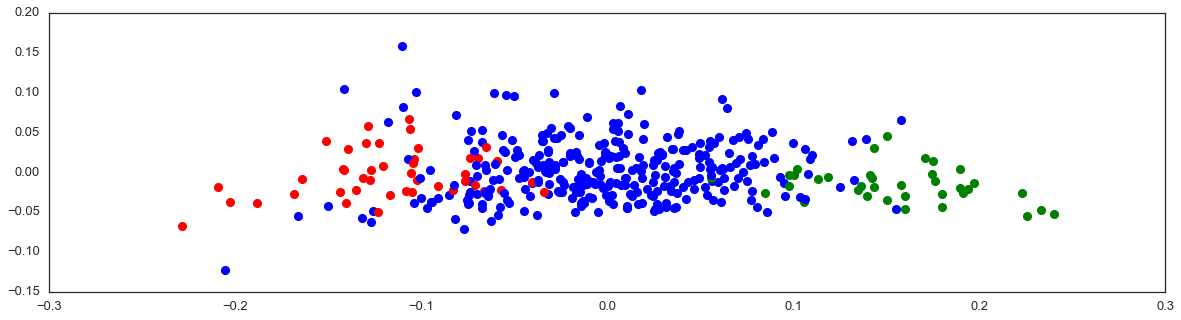

In [127]:

plt.figure()
for i,x in enumerate(x_r[:,0]):
    y = x_r[i,1]
    if i in sig_up:
        plt.plot(x,y,'ro')
    elif i in sig_down:
        plt.plot(x,y,'go')
    else:
        plt.plot(x,y,'bo')
fig.show()

### Clustering

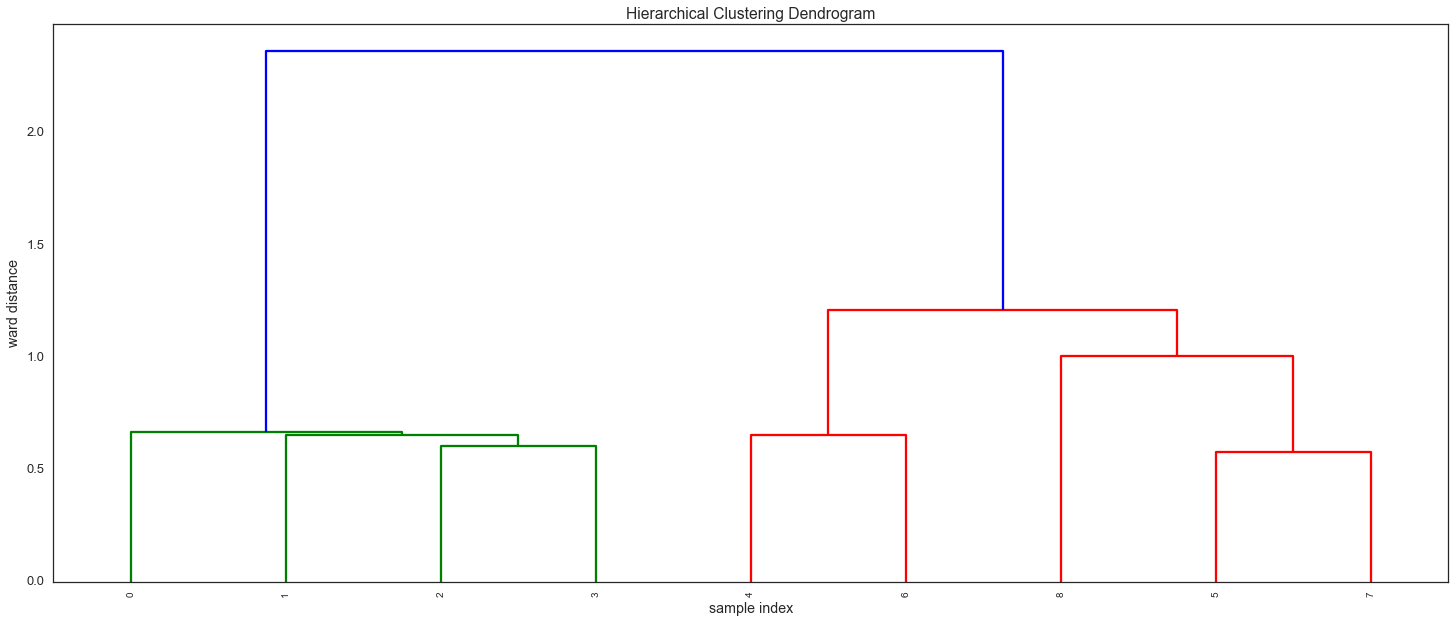

In [41]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

x = np.divide(alphas, alphas.sum(axis = 0))
print x.shape
# generate the linkage matrix
Z = linkage(x, 'ward')

# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('ward distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=10.,  # font size for the x axis labels
)
plt.show()

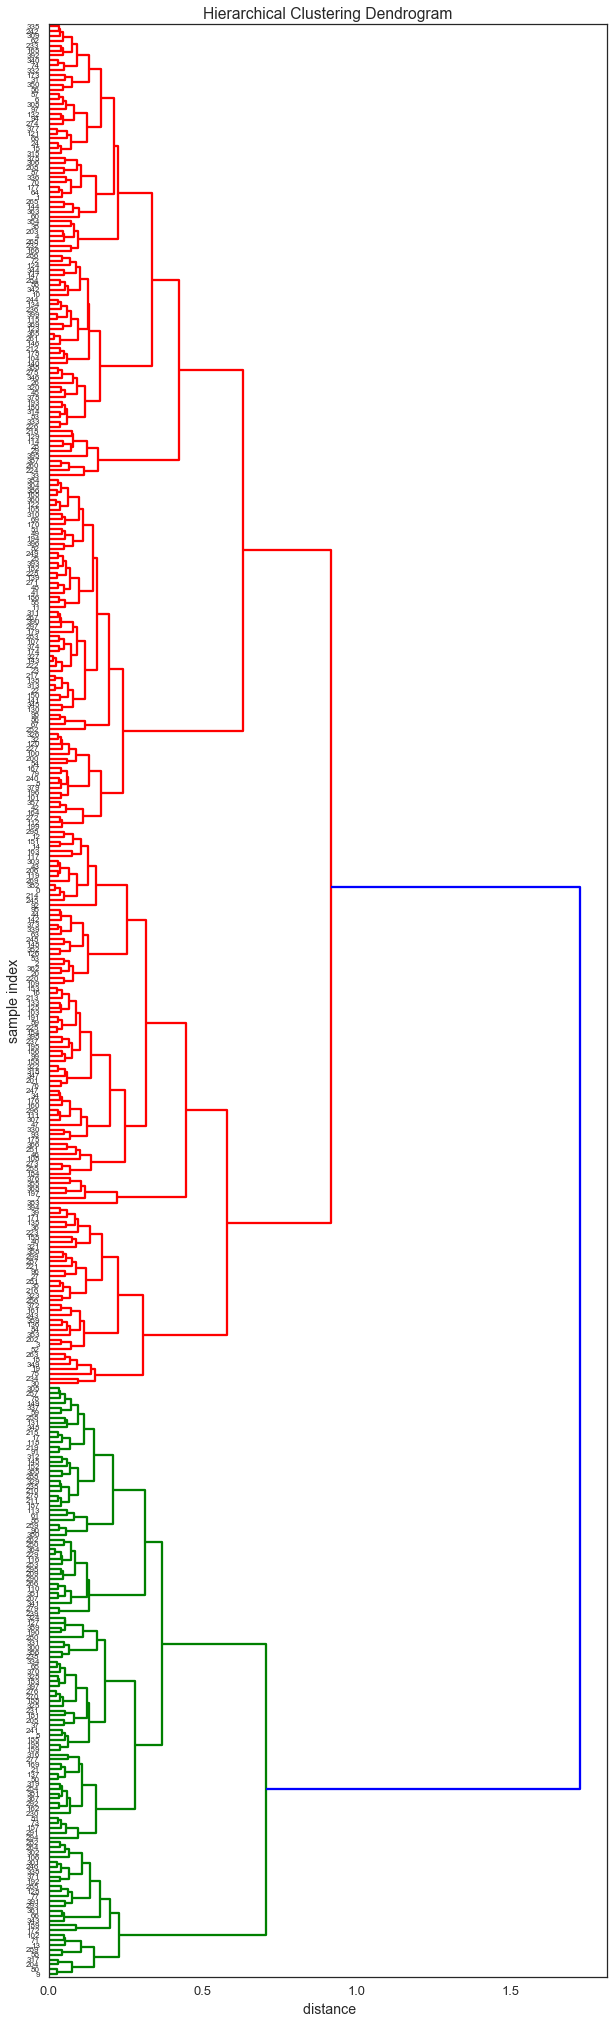

In [72]:
x = np.divide(alphas, alphas.sum(axis = 0)).transpose()
# generate the linkage matrix
Z = linkage(x, 'ward')

# calculate full dendrogram
plt.figure(figsize=(10, 35))
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('sample index')
plt.xlabel(' distance')
dendrogram(
    Z,
    orientation = 'right',
    #leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()